In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('../data/sales.csv')
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [3]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)


In [4]:
df = df.sort_values('Order Date')


In [5]:
monthly_sales = df.groupby(
    pd.Grouper(key='Order Date', freq='ME')
)['Sales'].sum().reset_index()


In [6]:
monthly_sales.columns = ['Date', 'Total_Sales']
monthly_sales.head()


,Date,Total_Sales
0,2015-01-31,14205.707
1,2015-02-28,4519.892
2,2015-03-31,55205.797
3,2015-04-30,27906.855
4,2015-05-31,23644.303


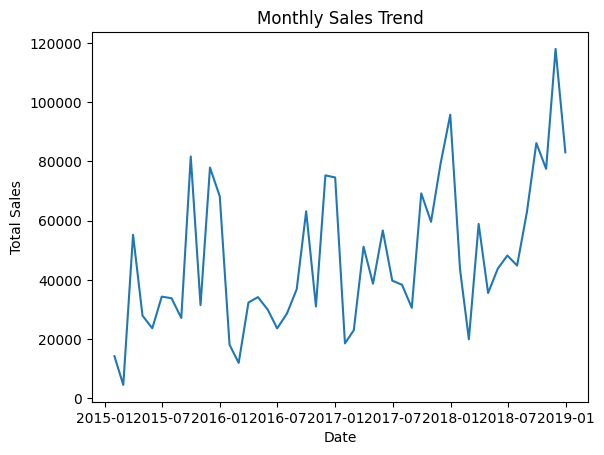

In [7]:
plt.figure()
plt.plot(monthly_sales['Date'], monthly_sales['Total_Sales'])
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()


In [8]:
monthly_sales['Month'] = monthly_sales['Date'].dt.month
monthly_sales['Year'] = monthly_sales['Date'].dt.year


In [9]:
X = monthly_sales[['Month', 'Year']]
y = monthly_sales['Total_Sales']


In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [11]:
monthly_sales['Predicted_Sales'] = model.predict(X)


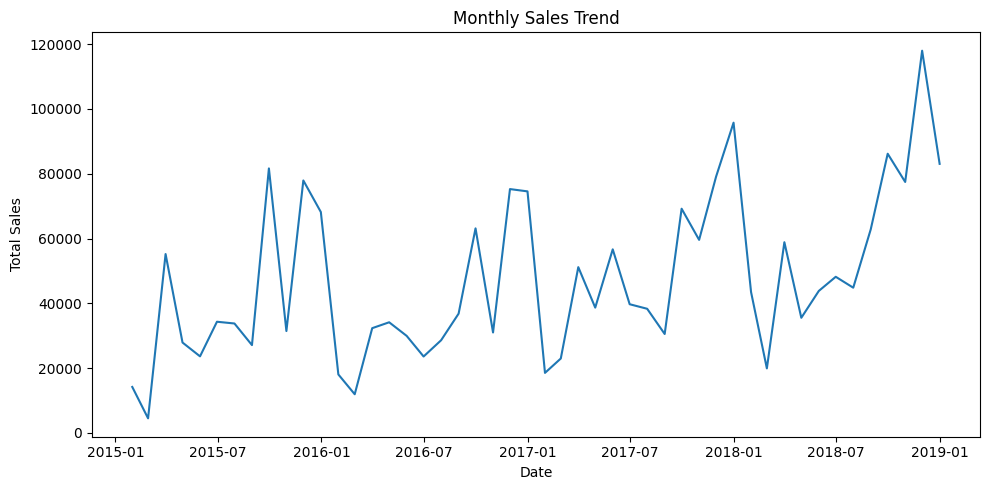

In [12]:
plt.figure(figsize=(10,5))
plt.plot(monthly_sales['Date'], monthly_sales['Total_Sales'])
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.savefig('../images/monthly_sales_trend.png')
plt.show()



In [13]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y, monthly_sales['Predicted_Sales'])
print("Mean Absolute Error:", mae)


Mean Absolute Error: 11685.692304353928


In [14]:
future = pd.DataFrame({
    'Month': [1,2,3,4,5,6],
    'Year': [2027,2027,2027,2027,2027,2027]
})

future['Forecasted_Sales'] = model.predict(future)
future


,Month,Year,Forecasted_Sales
0,1,2027,94363.062692
1,2,2027,99571.223604
2,3,2027,104779.384515
3,4,2027,109987.545427
4,5,2027,115195.706338
5,6,2027,120403.867250


## 📌 Business Insights & Interpretation

1. **Overall Sales Trend**  
   The monthly sales data shows a clear trend over time, indicating consistent business activity with seasonal variations.

2. **Seasonal Demand Patterns**  
   Certain months experience higher sales compared to others, suggesting seasonal demand. Businesses can plan inventory accordingly.

3. **Forecast Interpretation**  
   The forecasting model provides an estimate of future sales based on historical trends, which can support demand planning and budgeting.

4. **Business Impact**  
   These insights help businesses:
   - Optimize inventory levels  
   - Plan staffing during high-demand periods  
   - Prepare marketing strategies in advance


In [15]:
monthly_sales.head()


,Date,Total_Sales,Month,Year,Predicted_Sales
0,2015-01-31,14205.707,1,2015,7628.664902
1,2015-02-28,4519.892,2,2015,12836.825814
2,2015-03-31,55205.797,3,2015,18044.986725
3,2015-04-30,27906.855,4,2015,23253.147637
4,2015-05-31,23644.303,5,2015,28461.308548


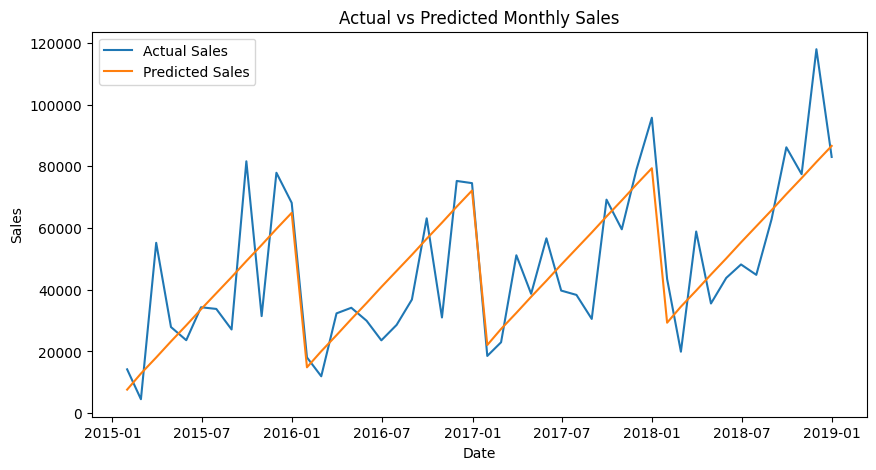

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

plt.plot(
    monthly_sales['Date'],
    monthly_sales['Total_Sales'],
    label='Actual Sales'
)

plt.plot(
    monthly_sales['Date'],
    monthly_sales['Predicted_Sales'],
    label='Predicted Sales'
)

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Monthly Sales')

plt.legend()
plt.show()


### Model Comparison Analysis

The comparison plot shows that the predicted sales follow the overall trend of actual monthly sales.  
This indicates that the model captures the general sales pattern and can be used for demand forecasting.
